In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Features_ManualRS.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.sample(5)

,PatID,Fraction,Contour,ContourType,Feature,FeatureValue
2603,829,5,RP,Manual,glszm_ZoneEntropy,0.459331
3979,1553,3,RP,Manual,gldm_LargeDependenceHighGrayLevelEmphasis,0.302017
5106,1540,4,RP,Manual,glrlm_RunVariance,0.170342
578,713,1,RP,Manual,glcm_SumSquares,0.141203
8314,826,5,RP,Manual,firstorder_Kurtosis,0.037761


In [65]:
patIDs = df['PatID'].unique()
rand_pats = np.random.choice(patIDs, 1, replace=False)
df_plot = df[df['PatID'].isin(rand_pats)]
# df_plot['Feature'] = df_plot['Group'] + '_' + df_plot['Feature']

fts = df_plot['Feature'].unique()
rand_fts = np.random.choice(fts, 2, replace=False)


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  import sys
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  # Remove the CWD from sys.path while we load stuff.


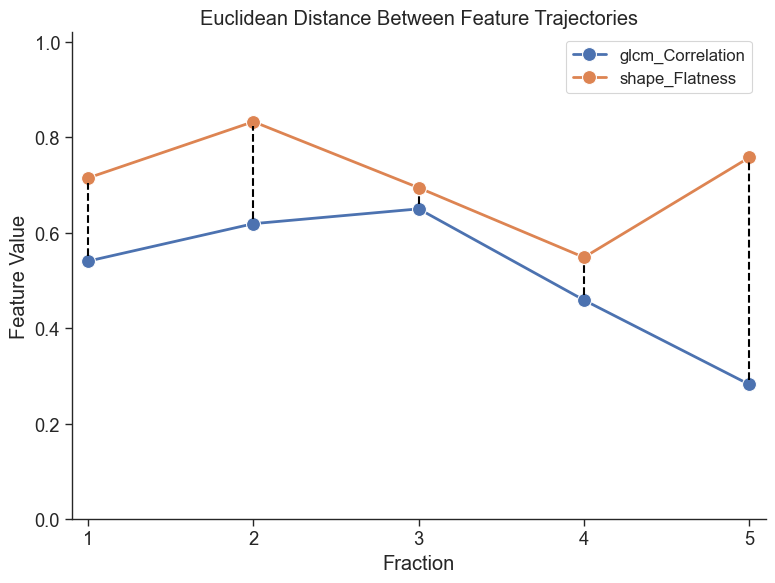

In [68]:
df_plot = df_plot.loc[df_plot['Feature'].isin(fts)]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_context("paper", font_scale=1.5)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plot
sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, label=rand_fts[0], linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, label=rand_fts[1], linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

ax.set_xlabel('Fraction')
ax.set_ylabel('Feature Value')
ax.set_xlim([0.9, 5.1])
ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 5.1, 1))
ax.set_xticklabels(np.arange(1, 6, 1))
ax.set_title('Euclidean Distance Between Feature Trajectories')
# ax.set_ylim([0, 1.05])
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.7, 1))
y_vals1 = df_plot.loc[df_plot['Feature'] == rand_fts[0]]['FeatureValue'].values + 0.01
y_vals2 = df_plot.loc[df_plot['Feature'] == rand_fts[1]]['FeatureValue'].values - 0.01

for i in range(1, 6):
    ax.vlines(i, y_vals1[i-1], y_vals2[i-1], color='black', linestyle='dashed', linewidth=1.5)

sns.set_theme(style="ticks", rc=custom_params)
plt.tight_layout()
plt.savefig('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Visualisation/Plots/LinePlotED.png', dpi=300)
